In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
runs = pd.read_csv(r'C:\Users\91983\Desktop\PGA\ml\ipl csv\Ball_by_Ball.csv')

In [3]:
match =pd.read_csv(r'C:\Users\91983\Desktop\PGA\ml\ipl csv\Match.csv')
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Match_Date           577 non-null    object 
 2   Team_Name_Id         577 non-null    int64  
 3   Opponent_Team_Id     577 non-null    int64  
 4   Season_Id            577 non-null    int64  
 5   Venue_Name           577 non-null    object 
 6   Toss_Winner_Id       577 non-null    int64  
 7   Toss_Decision        577 non-null    object 
 8   IS_Superover         577 non-null    int64  
 9   IS_Result            577 non-null    int64  
 10  Is_DuckWorthLewis    577 non-null    int64  
 11  Win_Type             577 non-null    object 
 12  Won_By               568 non-null    float64
 13  Match_Winner_Id      574 non-null    float64
 14  Man_Of_The_Match_Id  574 non-null    float64
 15  First_Umpire_Id      577 non-null    int

In [4]:
players=pd.read_csv(r"C:\Users\91983\Desktop\PGA\ml\ipl csv\Player.csv")

In [5]:
player_match=pd.read_csv(r"C:\Users\91983\Desktop\PGA\ml\ipl csv\Player_Match.csv")

In [6]:
season = pd.read_csv(r'C:\Users\91983\Desktop\PGA\ml\ipl csv\Season.csv')

In [7]:
team = pd.read_csv(r"C:\Users\91983\Desktop\PGA\ml\ipl csv\Team.csv")

In [8]:
#information about team data
#no null values
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team_Id          13 non-null     int64 
 1   Team_Name        13 non-null     object
 2   Team_Short_Code  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes


In [9]:
#information about match data
#no null values
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Match_Date           577 non-null    object 
 2   Team_Name_Id         577 non-null    int64  
 3   Opponent_Team_Id     577 non-null    int64  
 4   Season_Id            577 non-null    int64  
 5   Venue_Name           577 non-null    object 
 6   Toss_Winner_Id       577 non-null    int64  
 7   Toss_Decision        577 non-null    object 
 8   IS_Superover         577 non-null    int64  
 9   IS_Result            577 non-null    int64  
 10  Is_DuckWorthLewis    577 non-null    int64  
 11  Win_Type             577 non-null    object 
 12  Won_By               568 non-null    float64
 13  Match_Winner_Id      574 non-null    float64
 14  Man_Of_The_Match_Id  574 non-null    float64
 15  First_Umpire_Id      577 non-null    int

In [10]:
# Rename 'Team_Id' to 'Team_Name_Id' in team df
team.rename(columns = {'Team_Id':'Team_Name_Id'}, inplace = True)
team.columns

Index(['Team_Name_Id', 'Team_Name', 'Team_Short_Code'], dtype='object')

In [11]:
# mergeing both df on 'Team_Name_Id'
cdf = pd.merge(match, team, on='Team_Name_Id')
print(cdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Match_Date           577 non-null    object 
 2   Team_Name_Id         577 non-null    int64  
 3   Opponent_Team_Id     577 non-null    int64  
 4   Season_Id            577 non-null    int64  
 5   Venue_Name           577 non-null    object 
 6   Toss_Winner_Id       577 non-null    int64  
 7   Toss_Decision        577 non-null    object 
 8   IS_Superover         577 non-null    int64  
 9   IS_Result            577 non-null    int64  
 10  Is_DuckWorthLewis    577 non-null    int64  
 11  Win_Type             577 non-null    object 
 12  Won_By               568 non-null    float64
 13  Match_Winner_Id      574 non-null    float64
 14  Man_Of_The_Match_Id  574 non-null    float64
 15  First_Umpire_Id      577 non-null    int

In [12]:
# columns that are not required for analysis:-
#- match date 
#- first umpire id
#- second umpire id
#- team short code :- team name is given


In [13]:
df= cdf.drop(columns =[ 'First_Umpire_Id', 'Second_Umpire_Id', 'Match_Date','Team_Short_Code'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Team_Name_Id         577 non-null    int64  
 2   Opponent_Team_Id     577 non-null    int64  
 3   Season_Id            577 non-null    int64  
 4   Venue_Name           577 non-null    object 
 5   Toss_Winner_Id       577 non-null    int64  
 6   Toss_Decision        577 non-null    object 
 7   IS_Superover         577 non-null    int64  
 8   IS_Result            577 non-null    int64  
 9   Is_DuckWorthLewis    577 non-null    int64  
 10  Win_Type             577 non-null    object 
 11  Won_By               568 non-null    float64
 12  Match_Winner_Id      574 non-null    float64
 13  Man_Of_The_Match_Id  574 non-null    float64
 14  City_Name            577 non-null    object 
 15  Host_Country         577 non-null    obj

In [15]:
# converting int columns into obj for analysis

In [16]:
num_cols=[col for col in df.columns if col in df.select_dtypes("int64").columns]
num_cols
df.Match_Id.value_counts

<bound method IndexOpsMixin.value_counts of 0      335987
1      335997
2      336001
3      336011
4      336017
        ...  
572    980954
573    980962
574    980984
575    981002
576    981010
Name: Match_Id, Length: 577, dtype: int64>

In [17]:
for i in num_cols:
    df[i] = df[i].apply(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    object 
 1   Team_Name_Id         577 non-null    object 
 2   Opponent_Team_Id     577 non-null    object 
 3   Season_Id            577 non-null    object 
 4   Venue_Name           577 non-null    object 
 5   Toss_Winner_Id       577 non-null    object 
 6   Toss_Decision        577 non-null    object 
 7   IS_Superover         577 non-null    object 
 8   IS_Result            577 non-null    object 
 9   Is_DuckWorthLewis    577 non-null    object 
 10  Win_Type             577 non-null    object 
 11  Won_By               568 non-null    float64
 12  Match_Winner_Id      574 non-null    float64
 13  Man_Of_The_Match_Id  574 non-null    float64
 14  City_Name            577 non-null    object 
 15  Host_Country         577 non-null    obj

In [18]:
df["Match_Id"] = df["Match_Id"].apply(int)

In [19]:
df["Won_By"] = df['Won_By'].apply(float)

C:\Users\91983\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


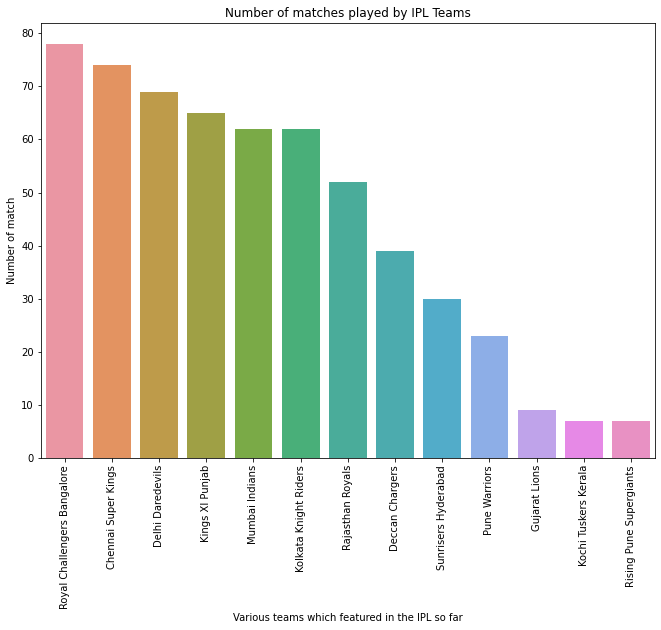

In [20]:
plt.figure(figsize = (11,8))
sns.countplot(df["Team_Name"],order = df.Team_Name.value_counts().index )
plt.xticks(rotation=90)
plt.xlabel("Various teams which featured in the IPL so far")
plt.ylabel("Number of match")
plt.title("Number of matches played by IPL Teams");

C:\Users\91983\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


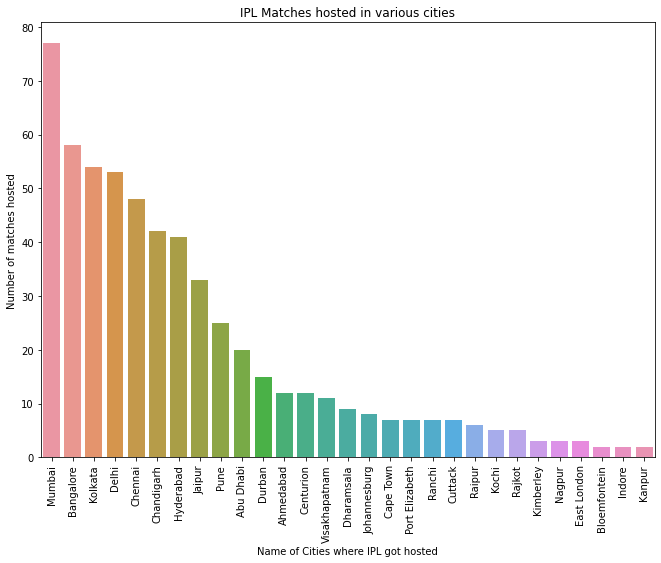

In [21]:
plt.figure(figsize = (11,8))
sns.countplot(df["City_Name"],order = df.City_Name.value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("Number of matches hosted")
plt.xlabel("Name of Cities where IPL got hosted")
plt.title("IPL Matches hosted in various cities");

C:\Users\91983\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


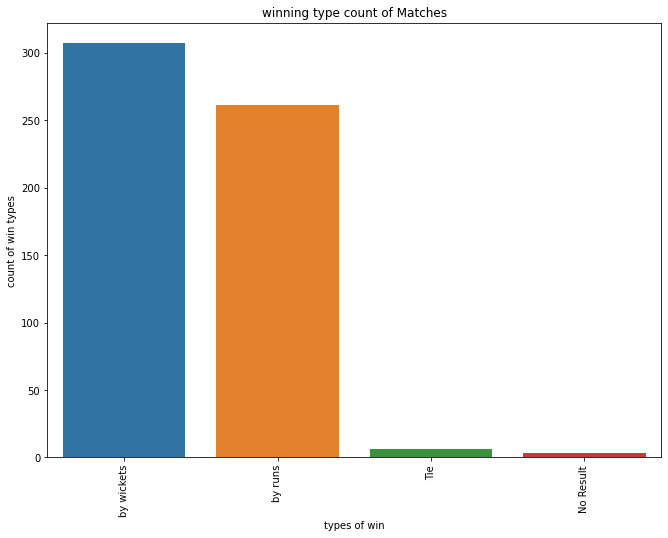

In [22]:
plt.figure(figsize = (11,8))
sns.countplot(df["Win_Type"],order = df.Win_Type.value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("count of win types")
plt.xlabel("types of win")
plt.title("winning type count of Matches");

In [23]:
tied_count = df[df.Win_Type == "Tie"].count()['Win_Type']
no_result = df[df.Win_Type == "No Result"].count()['Win_Type']

In [24]:
print("Tied Matches in IPL = ", tied_count)
print("no result Matches in IPL = ", no_result)

Tied Matches in IPL =  6
no result Matches in IPL =  3


In [25]:
df.columns

Index(['Match_Id', 'Team_Name_Id', 'Opponent_Team_Id', 'Season_Id',
       'Venue_Name', 'Toss_Winner_Id', 'Toss_Decision', 'IS_Superover',
       'IS_Result', 'Is_DuckWorthLewis', 'Win_Type', 'Won_By',
       'Match_Winner_Id', 'Man_Of_The_Match_Id', 'City_Name', 'Host_Country',
       'Team_Name'],
      dtype='object')

In [26]:
# Count the number of matches won by batting second 
# win type == wickets means that first batting
first_batting= df[df["Win_Type"] == "by wickets"].count()['Win_Type']

# Count the number of matches won by batting first

second_batting= df[df["Win_Type"] == "by runs"].count()['Win_Type']

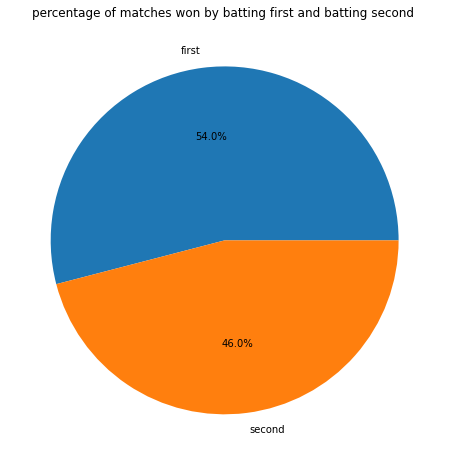

In [27]:
plt.figure(figsize = (11,8))
plt.pie([first_batting, second_batting], labels = ["first","second"],autopct="%1.1f%%") 
plt.title("percentage of matches won by batting first and batting second ");

probability of getting a tied match or no result
-pof tie = totaltie/totalwintype
-pof nres = totnre/totalwt

In [28]:
p_of_tied_match = df[df.Win_Type == "Tie"].count()['Win_Type'] / df.count()['Win_Type']
p_of_no_result = df[df.Win_Type == "No Result"].count()['Win_Type'] / df.count()['Win_Type']

In [29]:
print("Probability of a match getting tied is - ", p_of_tied_match)
print("Probability of a match having no result is - ", p_of_no_result)

Probability of a match getting tied is -  0.010398613518197574
Probability of a match having no result is -  0.005199306759098787


probability of winning the match batting first and second

In [30]:
batting_first = df[df["Win_Type"] == "by runs"].count()['Win_Type'] / df['Win_Type'].count()

In [31]:
batting_second = df[df["Win_Type"] == "by wickets"].count()["Win_Type"] / df['Win_Type'].count()

In [32]:
print("Probability of winning a match by batting first - ", batting_first)
print("Probability of winning a match by batting second - ", batting_second)

Probability of winning a match by batting first -  0.45233968804159447
Probability of winning a match by batting second -  0.5320623916811091


C:\Users\91983\AppData\Local\Temp/ipykernel_5200/2717991110.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([batting_first, batting_second], labels = ["first","second"],autopct="%1.1f%%")


Text(0.5, 1.0, 'probability of matches won by batting first and batting second')

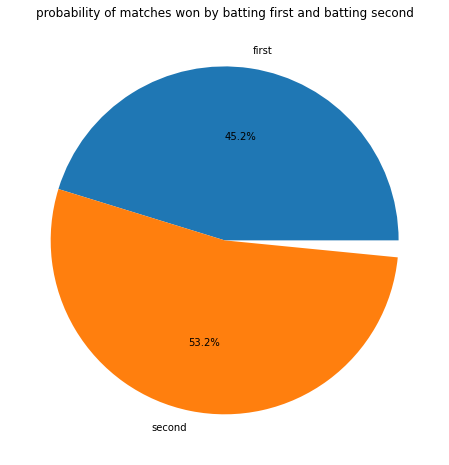

In [33]:
plt.figure(figsize = (11,8))
plt.pie([batting_first, batting_second], labels = ["first","second"],autopct="%1.1f%%")
plt.title("probability of matches won by batting first and batting second")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Team_Name_Id         577 non-null    object 
 2   Opponent_Team_Id     577 non-null    object 
 3   Season_Id            577 non-null    object 
 4   Venue_Name           577 non-null    object 
 5   Toss_Winner_Id       577 non-null    object 
 6   Toss_Decision        577 non-null    object 
 7   IS_Superover         577 non-null    object 
 8   IS_Result            577 non-null    object 
 9   Is_DuckWorthLewis    577 non-null    object 
 10  Win_Type             577 non-null    object 
 11  Won_By               568 non-null    float64
 12  Match_Winner_Id      574 non-null    float64
 13  Man_Of_The_Match_Id  574 non-null    float64
 14  City_Name            577 non-null    object 
 15  Host_Country         577 non-null    obj

In [35]:
b= df[(df["Win_Type"] == "by wickets") & (df["Team_Name"] == "Royal Challengers Bangalore")]
len(b)

41

In [36]:
a= df[(df["Win_Type"] == "by runs") & (df["Team_Name"] == "Royal Challengers Bangalore")]
rcb_first = len(a) / df['Win_Type'].count()
b= df[(df["Win_Type"] == "by wickets") & (df["Team_Name"] == "Royal Challengers Bangalore")]
rcb_second = len(b) / df["Win_Type"].count()


C:\Users\91983\AppData\Local\Temp/ipykernel_5200/1818472505.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([rcb_first, rcb_second], labels = ["first","second"],autopct="%1.1f%%")


Text(0.5, 1.0, 'probability of rcb winning by batting first and batting second')

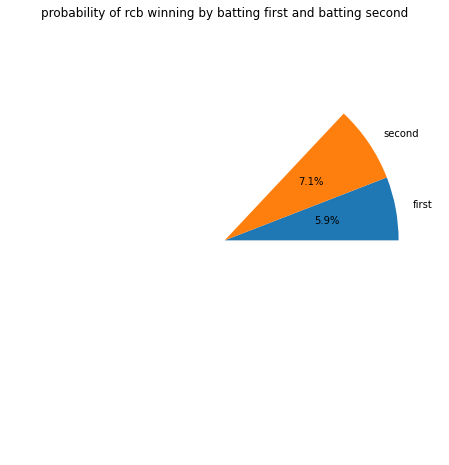

In [37]:
plt.figure(figsize = (11,8))
plt.pie([rcb_first, rcb_second], labels = ["first","second"],autopct="%1.1f%%")
plt.title("probability of rcb winning by batting first and batting second")